In [2]:
import pandas as pd

In [3]:
df_log_HT = pd.read_csv("/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv" ,low_memory=False)

In [4]:
df_log_apr = pd.read_csv("/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv" ,low_memory=False)

In [5]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "SWITCH_NO"  

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv"
file2_column_name = "SWITCH_NO" 


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 5145 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv...
  - Found 199 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: SWITCH_NO): 5145
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv' (Column: SWITCH_NO): 199
-------------------------
Number of values that matched: 177
-------------------------


In [6]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "SWITCH_NO"  

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/CSV FILE/EXETRA FILES/feeder_ids_list_11kv.csv"
file2_column_name = "FEEDER"


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 5145 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/CSV FILE/EXETRA FILES/feeder_ids_list_11kv.csv...
  - Found 1191 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: SWITCH_NO): 5145
Unique values in '/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/CSV FILE/EXETRA FILES/feeder_ids_list_11kv.csv' (Column: FEEDER): 1191
-------------------------
Number of values that matched: 978
-------------------------


In [7]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "FREE_REMARKS" 

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv"
file2_column_name = "FREE_REMARKS" 


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 1098 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv...
  - Found 41 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: FREE_REMARKS): 1098
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv' (Column: FREE_REMARKS): 41
-------------------------
Number of values that matched: 26
-------------------------


In [8]:
col = df_log_HT[df_log_HT["ENTRY_TYPE"]==1]

In [9]:
len(col)

11073

In [10]:
col1 = df_log_HT['ENTRY_TYPE'].unique()

In [11]:
col['ENTRY_TYPE'].unique()  

array([1])

 Visualizing Missing Values :


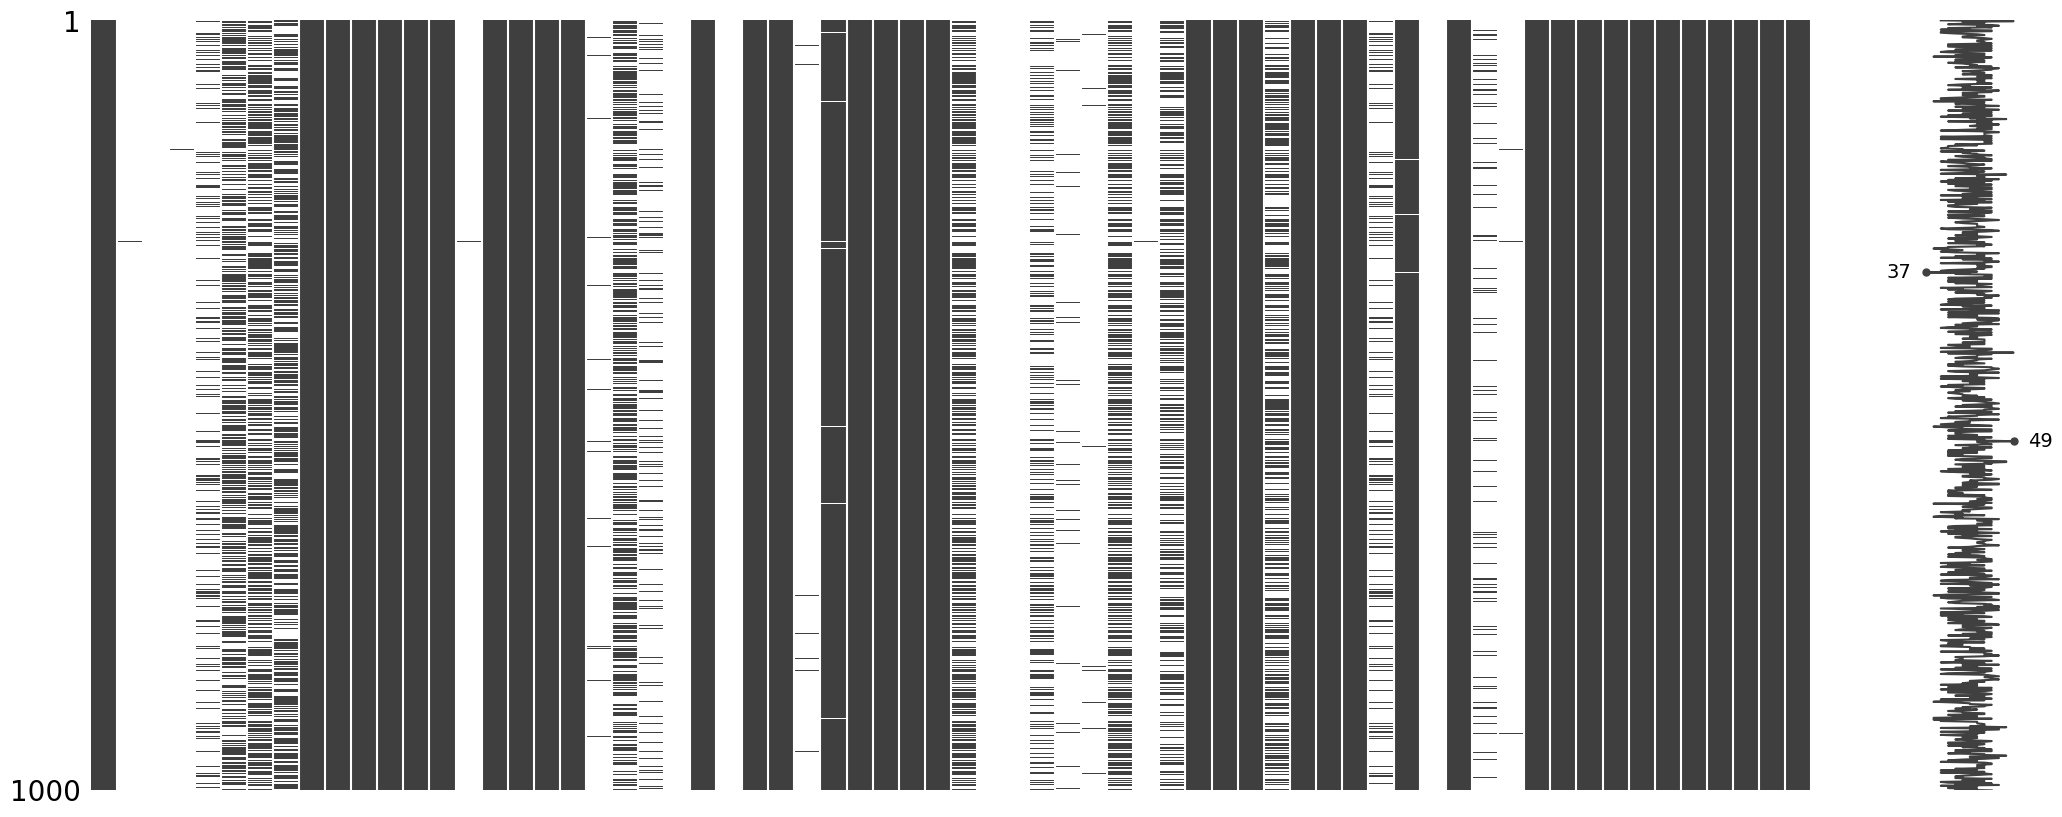

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

print(" Visualizing Missing Values :")
msno.matrix(df_log_HT.sample(min(len(df_log_HT), 1000)))
plt.show()



In [20]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "MAIN_REPORTED_TIME" 

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file2_column_name = "FIRAT_TIME" 


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 10 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 10 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: MAIN_REPORTED_TIME): 10
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: FIRAT_TIME): 10
-------------------------
Number of values that matched: 10
-------------------------


In [24]:
# Read the relevant columns from the file
df = pd.read_csv(file1_path, usecols=[file1_column_name, file2_column_name], low_memory=False)

# Get unique values from each column
unique_file1 = set(df[file1_column_name].dropna().unique())
unique_file2 = set(df[file2_column_name].dropna().unique())

# Find the intersection (matching unique values)
matching_unique_values = unique_file1.intersection(unique_file2)

# Print the length of matching unique values
print("Number of matching unique values:", len(matching_unique_values))

Number of matching unique values: 21444


In [21]:
col = df_log_HT['FIRAT_TIME'].unique()

In [20]:
import pandas as pd

df = pd.read_csv(
    '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET_CLEAN.csv',
    quotechar='"',
    encoding='utf-8',
    engine='python',        # for messy/multiline files
    on_bad_lines='skip'     # skip problematic lines (new pandas)
)


In [29]:
with open('/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv', encoding='utf-8') as f:
    for idx, line in enumerate(f):
        if idx == 0:
            expected = len(line.split(','))
        else:
            cols = len(line.split(','))
            if cols != expected:
                print(f"Row {idx+1} has {cols} columns (Expected: {expected})")


Row 3 has 69 columns (Expected: 67)
Row 4 has 69 columns (Expected: 67)
Row 5 has 70 columns (Expected: 67)
Row 6 has 70 columns (Expected: 67)
Row 7 has 69 columns (Expected: 67)
Row 8 has 70 columns (Expected: 67)
Row 9 has 69 columns (Expected: 67)
Row 10 has 70 columns (Expected: 67)
Row 11 has 69 columns (Expected: 67)
Row 13 has 70 columns (Expected: 67)
Row 14 has 69 columns (Expected: 67)
Row 15 has 70 columns (Expected: 67)
Row 16 has 70 columns (Expected: 67)
Row 17 has 70 columns (Expected: 67)
Row 18 has 70 columns (Expected: 67)
Row 19 has 70 columns (Expected: 67)
Row 20 has 69 columns (Expected: 67)
Row 21 has 69 columns (Expected: 67)
Row 22 has 70 columns (Expected: 67)
Row 23 has 70 columns (Expected: 67)
Row 24 has 69 columns (Expected: 67)
Row 25 has 70 columns (Expected: 67)
Row 26 has 74 columns (Expected: 67)
Row 27 has 69 columns (Expected: 67)
Row 28 has 70 columns (Expected: 67)
Row 29 has 69 columns (Expected: 67)
Row 30 has 69 columns (Expected: 67)
Row 31 h

In [28]:
import pandas as pd

# 1. Load file
df = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv', low_memory=False)

# 2. Filter rows where ENTRY_TYPE == 1
df1 = df[df['ENTRY_TYPE'] == 1].copy()

# 3. Convert time columns to datetime
df1['MAIN_REPORTED_TIME'] = pd.to_datetime(df1['MAIN_REPORTED_TIME'], errors='coerce')
df1['TIME_RESTORED'] = pd.to_datetime(df1['TIME_RESTORED'], errors='coerce')

# 4. Calculate time difference in minutes
df1['TIME_DIFFERENCE'] = (df1['TIME_RESTORED'] - df1['MAIN_REPORTED_TIME']).dt.total_seconds() / 60

# 5. Save only relevant columns
df1[['MAIN_REPORTED_TIME', 'TIME_RESTORED', 'TIME_DIFFERENCE']].to_csv(
    '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET_ONLY_TIME_DIFF.csv',
    index=False
)

print("DONE: Saved file with time difference only.")
print(df1[['MAIN_REPORTED_TIME', 'TIME_RESTORED', 'TIME_DIFFERENCE']].head())


DONE: Saved file with time difference only.
         MAIN_REPORTED_TIME             TIME_RESTORED  TIME_DIFFERENCE
2 2020-04-30 17:54:08+00:00 2020-04-30 17:33:00+00:00       -21.133333
3 2020-06-03 15:41:43+00:00 2020-06-03 15:41:43+00:00         0.000000
4 2020-02-19 23:07:51+00:00 2020-02-19 22:45:31+00:00       -22.333333
5 2020-06-05 17:41:23+00:00 2020-06-05 16:09:00+00:00       -92.383333
6 2020-07-16 07:50:19+00:00 2020-07-16 07:50:19+00:00         0.000000


In [33]:
import pandas as pd
import re

# 1. Load file (final clean file)
df_original = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv')

# 2. Filter ENTRY_TYPE == 1
df_entry1 = df_original[df_original['ENTRY_TYPE'] == 1].copy().reset_index(drop=True)

# 3. UPPERCASE remarks
df_entry1['FREE_REMARKS_UPPER'] = df_entry1['FREE_REMARKS'].astype(str).str.upper()

# 4. Extraction functions
def extract_size(text):
    m = re.search(r'X\s*([\d\.\+\-\s]*SQ\.?\s*MM)', text)
    return m.group(1).replace(" ", "") if m else ""

def extract_insulation(text):
    m = re.search(r'(PILC\+XLPE|XLPE\+PILC|PILC|XLPE)', text)
    return m.group(1) if m else ""

def extract_voltage(text):
    m = re.search(r'(\d{2,3})\s*KV', text)
    return f"{m.group(1)}KV" if m else ""

def extract_type(text):
    m = re.search(r'(HTCF SECTION|LT SECTION|HT SECTION)', text)
    return m.group(1) if m else ""

def extract_section(text):
    m = re.search(r'BETWEEN\s+(.+?)\s+S/S\s+SWITCH:([0-9]+)\s+TO\s+(.+?)\s+S/S\s+SWITCH:([0-9]+)', text)
    if m:
        return pd.Series([m.group(1).strip(), m.group(2), m.group(3).strip(), m.group(4)])
    return pd.Series(["", "", "", ""])

def extract_delayed_reason(text):
    m = re.search(r'DELAYED DUE TO(.*?)(?:NOTIFICATION NO|$)', text)
    return m.group(1).strip() if m else ""

def extract_fault_nature(text):
    patterns = [
        'CABLE DAMAGED BY', 'DMS OFFLINE AT', 'FPI MALFUNCTION',
        'FAILED TO OPEN', 'FAILED TO CLOSE', 'WENT OFFLINE',
        'FEEDER TRIPPING', 'TRAFFIC ON', 'SUPPLY RESTORATION DELAYED'
    ]
    found = []
    for pat in patterns:
        for m in re.finditer(r'({0}.*?)(?:\.|,|;|NOTIFICATION NO|$)'.format(re.escape(pat)), text):
            found.append(m.group(1).strip())
    return '; '.join(found) if found else ""

# 5. Extraction (create new DataFrame for output)
out = pd.DataFrame()
out['Size'] = df_entry1['FREE_REMARKS_UPPER'].apply(extract_size)
out['Insulation'] = df_entry1['FREE_REMARKS_UPPER'].apply(extract_insulation)
out['Voltage'] = df_entry1['FREE_REMARKS_UPPER'].apply(extract_voltage)
out['Type'] = df_entry1['FREE_REMARKS_UPPER'].apply(extract_type)

section_cols = df_entry1['FREE_REMARKS_UPPER'].apply(extract_section)
section_cols.columns = ['FROM', 'FROM_SWITCH', 'TO', 'TO_SWITCH']
out = pd.concat([out, section_cols], axis=1)

out['DELAYED_REASON'] = df_entry1['FREE_REMARKS_UPPER'].apply(extract_delayed_reason)
out['FAULT_NATURE'] = df_entry1['FREE_REMARKS_UPPER'].apply(extract_fault_nature)

# Time columns
out['TIME_OUTAGE'] = df_entry1['TIME_OUTAGE'].astype(str)
out['MAIN_REPORTED_TIME'] = pd.to_datetime(df_entry1['MAIN_REPORTED_TIME'], errors='coerce')
out['TIME_RESTORED'] = pd.to_datetime(df_entry1['TIME_RESTORED'], errors='coerce')
out['TIME_DIFFERENCE'] = (out['TIME_RESTORED'] - out['MAIN_REPORTED_TIME']).dt.total_seconds() / 60

# 6. Save
final_cols = [
    'Size', 'Insulation', 'Voltage', 'Type',
    'FROM', 'FROM_SWITCH', 'TO', 'TO_SWITCH',
    'DELAYED_REASON', 'FAULT_NATURE',
    'TIME_OUTAGE', 'MAIN_REPORTED_TIME', 'TIME_RESTORED', 'TIME_DIFFERENCE'
]
out[final_cols].to_csv('/media/sagarkumar/New Volume/SAGAR/DATA_GENERATION/processed_fault_data_FINAL.csv', index=False)
print("Extracted file written.")
print(out[final_cols].head(10))


/tmp/ipykernel_1450806/1704671387.py:5: DtypeWarning: Columns (19,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv')


Extracted file written.
                        Size Insulation Voltage          Type  \
0                      SQ.MM  PILC+XLPE    11KV  HTCF SECTION   
1            .06+70+120SQ.MM  PILC+XLPE    11KV  HTCF SECTION   
2  0.15+185+225+300+240SQ.MM  PILC+XLPE    11KV  HTCF SECTION   
3                   120SQ.MM       PILC    11KV  HTCF SECTION   
4                   120SQ.MM       PILC    11KV  HTCF SECTION   
5                   120SQ.MM       PILC    11KV  HTCF SECTION   
6                   120SQ.MM       PILC    11KV  HTCF SECTION   
7                   120SQ.MM       PILC    11KV  HTCF SECTION   
8                   120SQ.MM       PILC    11KV  HTCF SECTION   
9                   120SQ.MM       PILC    11KV  HTCF SECTION   

                       FROM FROM_SWITCH                      TO TO_SWITCH  \
0  VISHWESHWAR NAGAR HETALI       40478                  SAMANT     05587   
1        JAWAHAR NAGAR NO.3       13847    SONAVALA ESTATE NO.1     00714   
2                            